In [ ]:
!pip  --q install pandas numpy scikit-learn pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=1ef91e59985924810288a0a5a4ca0eb0b732b1b14ae9a80e682f599dce164316
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from pyswarm import pso

In [ ]:
data_path = '/content/allData800 final.csv'
df = pd.read_csv(data_path)

In [ ]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def objective_function(features, X_train, X_test, y_train, y_test):
    features = np.array(features).astype(int)
    features_idx = np.where(features)[0]

    if len(features_idx) == 0:
        return 1.0

    clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=1000, random_state=42)
    clf.fit(X_train[:, features_idx], y_train)

    y_pred = clf.predict(X_test[:, features_idx])

    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

In [ ]:
lb = [0] * X_train_scaled.shape[1]
ub = [1] * X_train_scaled.shape[1]
options = {'swarmsize': 10, 'maxiter': 10, 'debug': True}

best_features, _ =  pso(objective_function, lb, ub, args=(X_train_scaled, X_test_scaled, y_train, y_test), **options)

No constraints given.
New best for swarm at iteration 1: [0.68335882 0.         0.21992235 0.6584649  0.87549112 1.
 0.91043612 1.         0.39142685 0.4546772  0.         0.
 0.         0.49631241 0.63591617 0.01893224 0.64737683 0.
 0.79872003 0.54986265 0.59128877] -0.6
New best for swarm at iteration 1: [0.54430799 0.95309944 0.98728686 0.93156388 0.         0.4813839
 0.47995957 1.         0.11296644 0.88277119 1.         0.55162784
 0.32173831 0.5648459  0.42835377 0.85017559 0.67141181 0.4911901
 0.8739613  0.47065124 0.88150005] -0.6625
New best for swarm at iteration 1: [0.41674957 1.         0.72682123 0.         0.64619644 0.77822426
 0.31710083 0.02751108 0.75706734 0.68775189 0.72181689 0.40027469
 1.         0.61012524 0.46053573 0.3330337  0.15306347 0.29035905
 1.         0.16260388 0.77955733] -0.725
New best for swarm at iteration 1: [0.34663245 0.55574179 0.30157184 0.61488353 1.         1.
 0.         0.         0.87688844 0.98909983 0.         0.35948066
 0.4908961

In [ ]:
# Extract selected features
best_features = np.array(best_features).astype(int)
selected_features_idx = np.where(best_features)[0]
selected_features = X.columns[selected_features_idx]

In [ ]:
selected_features

Index(['sg', 'phos', 'alb', 'creatinine', 'uricacid', 'ane'], dtype='object')

In [ ]:
# Train a BPNN mlp classifier using selected features
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=100, random_state=42)
history = clf.fit(X_train_scaled[:, selected_features_idx], y_train)
print(history)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled[:, selected_features_idx])

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Selected Features:", selected_features)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Selected Features: Index(['sg', 'phos', 'alb', 'creatinine', 'uricacid', 'ane'], dtype='object')

Accuracy: 0.96875

Classification Report:
               precision    recall  f1-score   support

         ckd       0.94      0.98      0.96        60
      notckd       0.99      0.96      0.97       100

    accuracy                           0.97       160
   macro avg       0.96      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



In [ ]:
# predictions on training and testing data
y_train_pred = clf.predict(X_train_scaled[:, selected_features_idx])
y_test_pred = clf.predict(X_test_scaled[:, selected_features_idx])

# performance on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Confusion Matrix and Classification Report for testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Training Accuracy: 0.9703125
Testing Accuracy: 0.96875

Confusion Matrix:
 [[59  1]
 [ 4 96]]

Classification Report:
               precision    recall  f1-score   support

         ckd       0.94      0.98      0.96        60
      notckd       0.99      0.96      0.97       100

    accuracy                           0.97       160
   macro avg       0.96      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



In [ ]:
import matplotlib.pyplot as plt

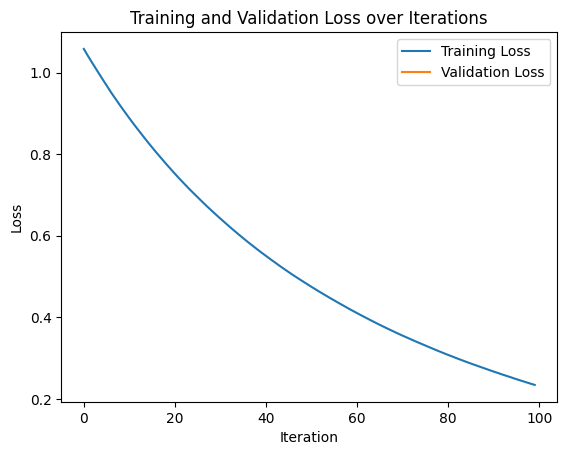

In [ ]:
train_accuracy = np.array(history.loss_curve_)
val_accuracy = np.array(history.validation_scores_)

# Plot learning curves for both training and testing epochs
plt.plot(train_accuracy, label='Training Loss')
plt.plot(val_accuracy, label='Validation Loss')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
